# **ECG Heartbeat Classification**

## **1. Table of Content**

- [1. Intro]()
- [2. Introduction to ECG Signals]()
  - [What are ECG Signals?]()
  - [Components of an ECG Signal]()
  - [Why Classify ECG Signals?]()
- [3. The Kaggle ECG Heartbeat Categorization Dataset]()
  - [Dataset Overview]()
  - [Which Method to Use for This Dataset?]()
  - [Conclusion: Use Deep Learning]()

### **1. Intro**

Welcome to the **HeartBeatInsight** project! This Jupyter Notebook is your entry point into understanding **ECG Heartbeat Classification** from the ground up. We'll explore time series data, ECG signals, and various methods to classify heartbeats, ultimately helping to determine the best approach for the [**Kaggle ECG Heartbeat Categorization Dataset**](https://www.kaggle.com/datasets/shayanfazeli/heartbeat).

### **2. Introduction to ECG Signals**

#### **📊 What are ECG Signals?**

An **Electrocardiogram (ECG)** measures the electrical activity of the heart over time. It's a non-invasive test used to detect heart problems like **arrhythmias (irregular heartbeats)**. Each ECG signal records a sequence of heartbeats, and each heartbeat can be categorized as **normal or abnormal**.

#### 🏥 Components of an ECG Signal

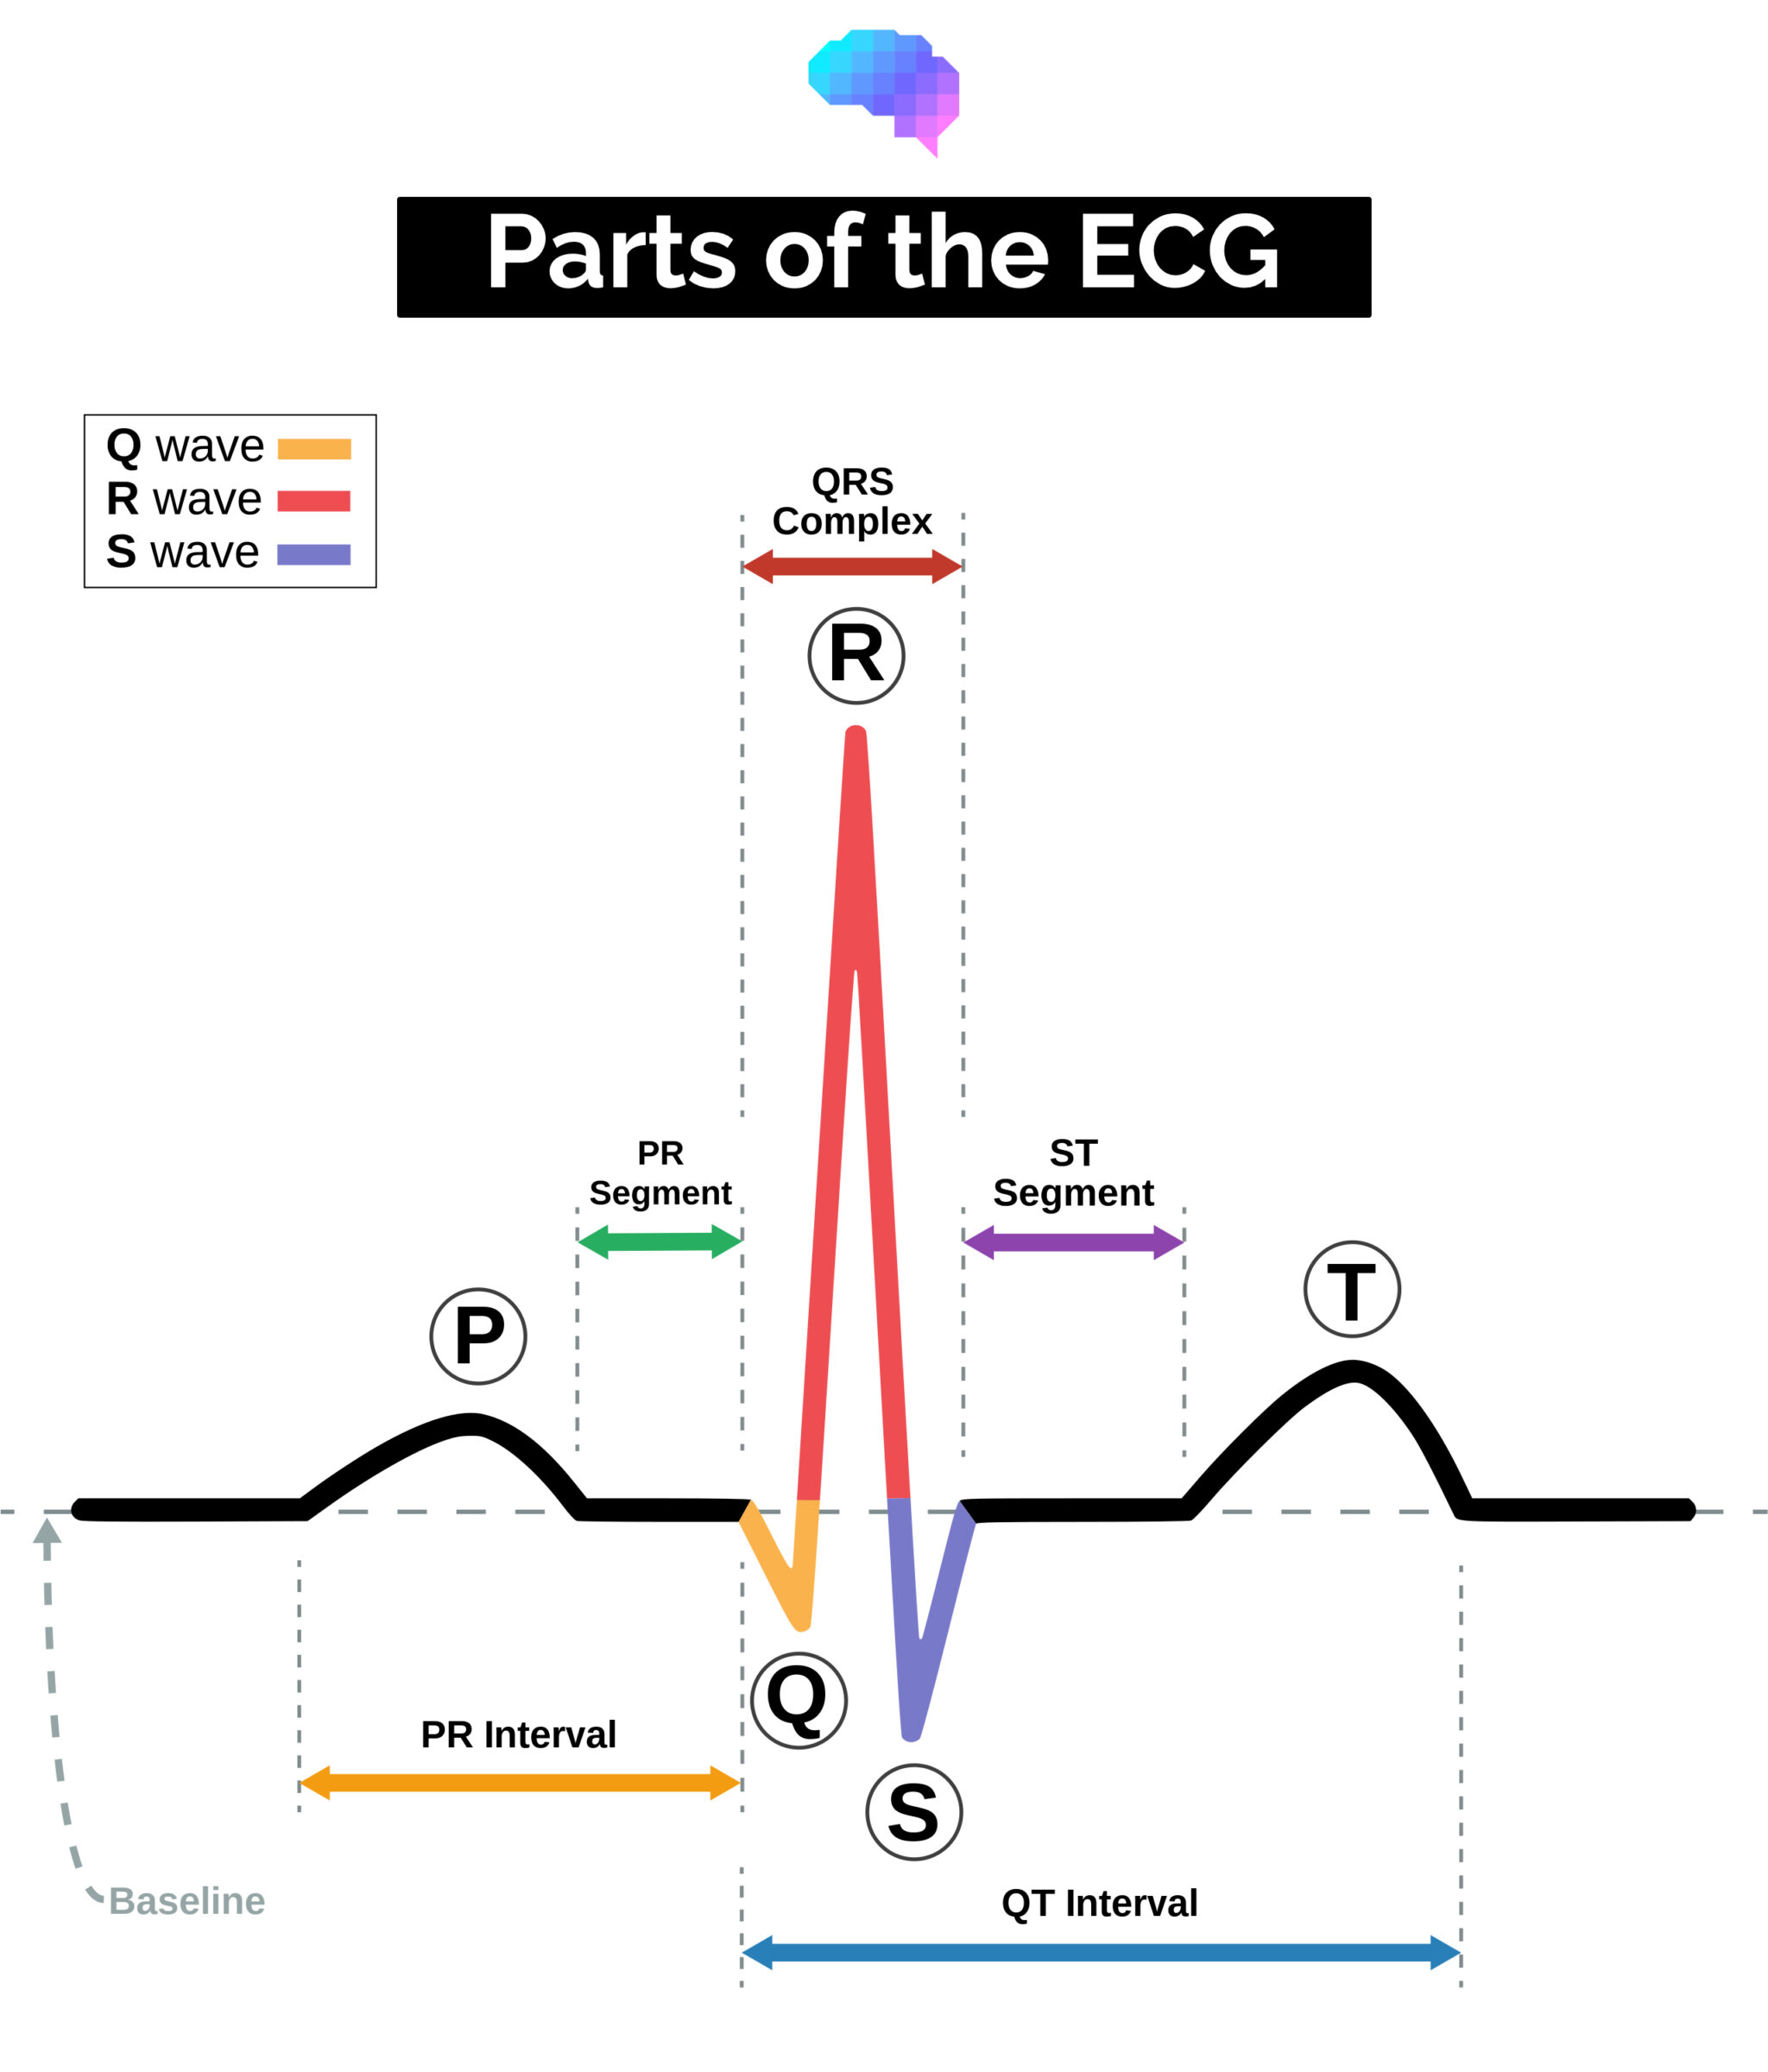

In [1]:
# Components of an ECG Signal

from IPython import display
display.Image("Downloads/Intro_ECG_Heartbeat_Classification-01.jpg")

- **P Waves**
    - P waves represent atrial depolarisation $\implies$ contraction of the atria (upper chambers).
    - In healthy individuals, there should be a P wave preceding each QRS complex.

- **PR Interval**
    - The PR interval begins at the start of the P wave and ends at the beginning of the Q wave.
    - It represents the time for electrical activity to move between the atria and the ventricles.

- **QRS Complex**
    - The QRS complex represents the ventricular depolarisation $\implies$ contraction of the ventricles (lower chambers).
    - It appears as three closely related waves on the ECG (the Q, R and S wave).

- **ST Segment**
    - The ST segment starts at the end of the S wave and ends at the beginning of the T wave.
    - The ST segment is an isoelectric line representing the time between depolarisation and repolarisation of the ventricles (i.e. ventricular contraction).

- **T Wave**
    - The T wave represents ventricular repolarisation $\implies$ relaxation of the ventricles.
    - It appears as a small wave after the QRS complex.

- **RR Interval**
    - The RR interval begins at the peak of one R wave and ends at the peak of the next R wave.
    - It represents the time between two QRS complexes.

- **QT Interval**
    - The QT interval begins at the start of the QRS complex and finishes at the end of the T wave.
    - It represents the time taken for the ventricles to depolarise and then repolarise.

#### **🔍 Why Classify ECG Signals?**

Accurately classifying ECG signals helps in diagnosing heart conditions. For example:

- **Normal Beats (N)**
    
- **Arrhythmias**: Supraventricular Ectopic Beats (S), Ventricular Ectopic Beats (V), Fusion Beats (F), and Unknown Beats (Q).

### **3. The Kaggle ECG Heartbeat Categorization Dataset**

### **🗂️ Dataset Overview**

This dataset, available on [Kaggle](https://www.kaggle.com/datasets/shayanfazeli/heartbeat), is derived from the **MIT-BIH Arrhythmia Database** and has been preprocessed for ease of use in heartbeat classification tasks. Below is a detailed overview of the dataset:

1. **Data Description**

    - The dataset is divided into two CSV files:
        
        - `mitbih_train.csv` (Training Data): Contains **87,554** heartbeat samples.
        
        - `mitbih_test.csv` (Testing Data): Contains **21,892** heartbeat samples.

    - Each row represents **a single heartbeat segment** described by **187 time steps (data points)**.

2. **Features**

    - **ECG Signal Data:**
        
        - Each heartbeat is represented by **187 numerical values**.
        
        - These values capture the time series of the ECG signal segment.

3. **Labels**

    - The dataset includes 5 distinct classes of heartbeats:

        <table>
            <tr>
                <th>Class Label</th>
                <th>Class Description</th>
                <th>Code</th>
            </tr>
            <tr>
                <td>0</td>
                <td>Normal Beat</td>
                <td>N</td>
            </tr>
            <tr>
                <td>1</td>
                <td>Supraventricular Ectopic Beat</td>
                <td>S</td>
            </tr>
            <tr>
                <td>2</td>
                <td>Ventricular Ectopic Beat</td>
                <td>V</td>
            </tr>
            <tr>
                <td>3</td>
                <td>Fusion Beat</td>
                <td>F</td>
            </tr>
            <tr>
                <td>4</td>
                <td>Unknown Beat</td>
                <td>Q</td>
            </tr>
        </table>

    - These classes are based on the **AAMI (Association for the Advancement of Medical Instrumentation)** heartbeat classification standard.

4. **Dataset Summary**

    - **Total Samples:**
        
        - **Training Set:** 87,554 heartbeats
        - **Test Set:** 21,892 heartbeats
        - **Combined Total:** 109,446 heartbeats

    - **Input Shape:**
        - Each sample has a shape of **(187,)** representing the 187 time steps in the ECG signal.

    - **Output:**
        - Each sample is labeled with one of the 5 heartbeat classes.

5. **Distribution of Classes**

    The dataset is **imbalanced**, meaning some classes have more samples than others. Here's the approximate distribution of heartbeats:

    - **Class 0 (Normal):** Most frequent.
    
    - **Class 1 (Supraventricular Ectopic):** Less frequent.
    
    - **Class 2 (Ventricular Ectopic):** Less frequent.
    
    - **Class 3 (Fusion):** Rare.
    
    - **Class 4 (Unknown):** Rare.

6. **Preprocessing Steps (Already Applied)**

    The dataset has been **segmented and normalized**, making it ready for model training.

### **Which Method to Use for This Dataset?**

Given the characteristics of this dataset:

1. **Dataset Size:** Large (87,554 samples in training).
    
2. **Complexity:** ECG signals have intricate patterns.
    
3. **Noise:** Real-world ECG data may contain noise.

### **✅ Conclusion: Use Deep Learning**

**Justification:**

- **Large Dataset:** Deep Learning models excel with large datasets.
    
- **Automatic Feature Extraction:** CNNs and LSTMs can learn features directly from raw signals.
    
- **Complex Patterns:** Deep Learning can capture subtle differences between heartbeat types.
    
- **Robustness to Noise:** DL models handle noisy data better than traditional methods.

Given the characteristics of this dataset — large sample size, complexity, and variability in heartbeats — **Deep Learning** is the most suitable approach for heartbeat classification.

## **2. Import the necessary libraries and load the dataset.**

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from collections import Counter
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, BatchNormalization, Flatten, MaxPool1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import label_binarize
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the training and testing datasets
train_df = pd.read_csv('E:\Final Project\Heartbeeat\mitbih_train.csv', header=None)
test_df = pd.read_csv('E:\Final Project\Heartbeeat\mitbih_test.csv', header=None)

# Rename columns: 1 to 187 for ECG data, Label for the label
train_df.columns = [i+1 for i in range(187)] + ['Label']
test_df.columns = [i+1 for i in range(187)] + ['Label']

# Display the first few rows of the training dataset
train_df.head()

1         2         3         4         5         6         7  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

          8         9        10  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   187  Label  
0  0.0    0.0  
1  0.0    0.0  
2  0.0    0.0  
3  0.0    0.0  
4  0.0    0.0  

[5 rows x 188 columns]

### **📝 Dataset Structure**
- **Rows:** Each row represents an individual heartbeat segment.

- **Columns:**

    - The first **187 columns** are the time-series values of the ECG signal.
    
    - The **188th column** is the label (heartbeat class).
 
### **📋 Summary of Classes**
| Class Label | Class Description | Code |
| :---------- | :---------------- | :--- |
| **0** | Normal Beat | **N** |
| **1** | Supraventricular Ectopic Beat | **S** |
| **2** | Ventricular Ectopic Beat | **V** |
| **3** | Fusion Beat | **F** |
| **4** | Unknown Beat | **Q** |

## **3. Initial Data Inspection**

### **3.1 Check Dataset Size**

In [4]:
print(f"Training Set Shape: {train_df.shape}")
print(f"Testing Set Shape: {test_df.shape}")

Training Set Shape: (87554, 188)
Testing Set Shape: (21892, 188)


### **3.2 Check for Missing Values**

In [5]:
print(f"Missing values in train_df: {train_df.isnull().sum().sum()}")
print(f"Missing values in test_df: {test_df.isnull().sum().sum()}")

Missing values in train_df: 0
Missing values in test_df: 0


**Interpretation:** The dataset has no missing values.

### **3.3 Class Distribution in Training and Testing Sets**

In [6]:
train_labels = train_df.iloc[:, -1]
test_labels = test_df.iloc[:, -1]

# Count the occurrences of each class
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print(f"Training Set Class Distribution: {train_class_counts}")
print(f"Testing Set Class Distribution: {test_class_counts}")

Training Set Class Distribution: Counter({0.0: 72471, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
Testing Set Class Distribution: Counter({0.0: 18118, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})


### **📝 Observations**
- Notice the **imbalance** in class distribution. Some classes have far fewer samples than others.

- This imbalance may affect model performance, requiring techniques like **resampling** or **class weighting**.

## **4. Visualizing ECG Signals**

### **4.1 Plot Example Heartbeats for Each Class**

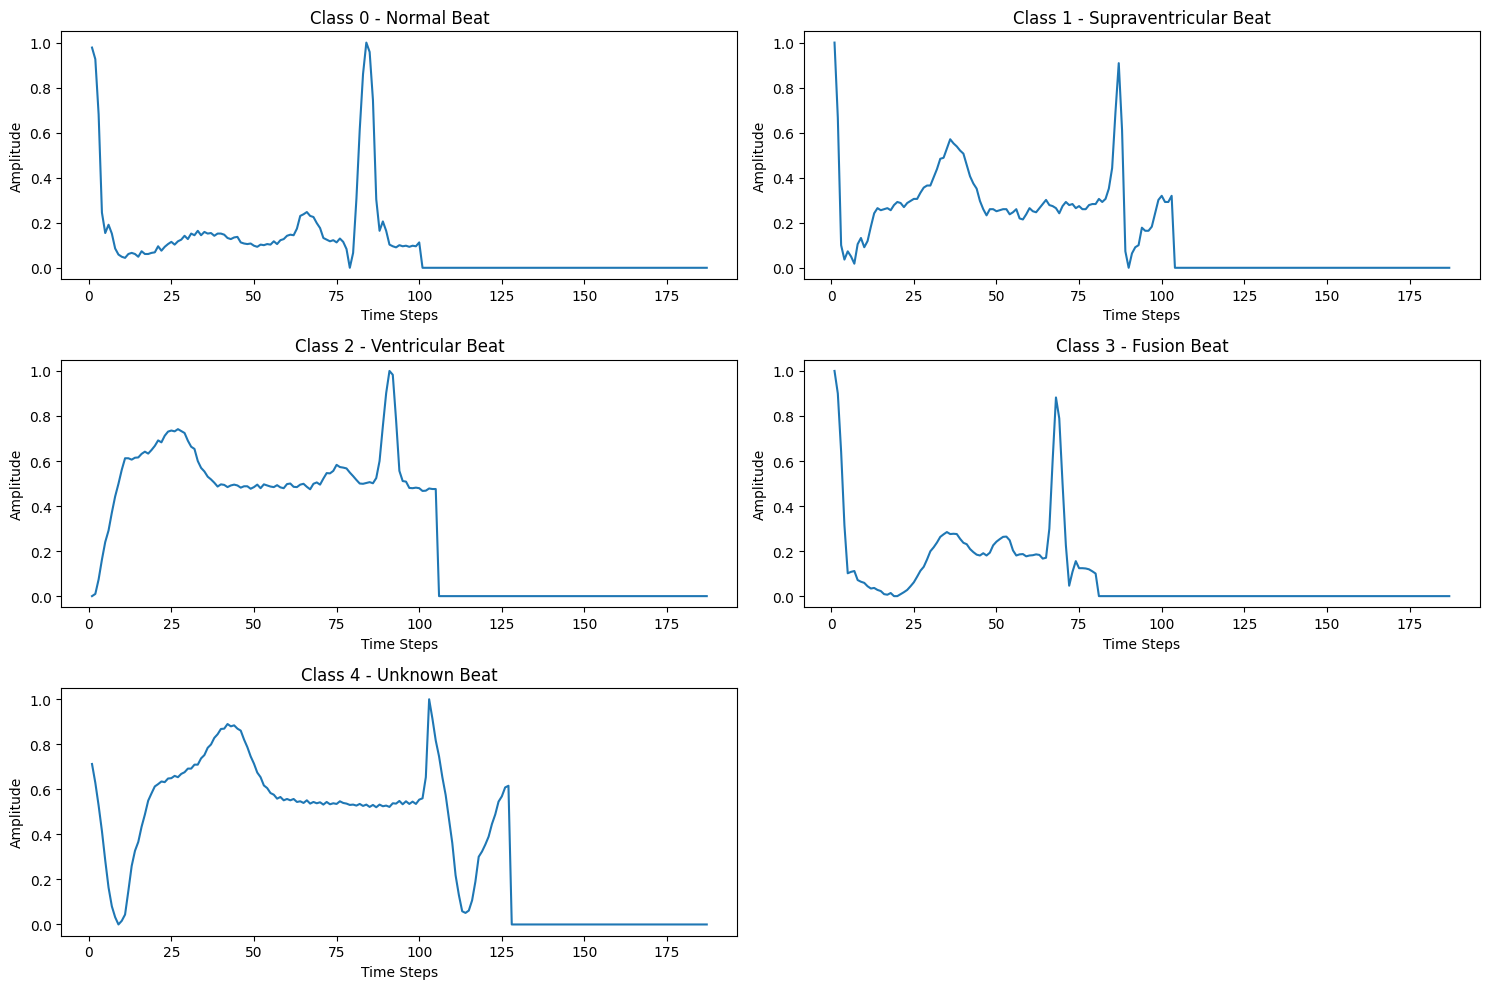

In [7]:
plt.figure(figsize=(15, 10))

# Plot one example from each class
for label in range(5):
    plt.subplot(3, 2, label + 1)
    sample = train_df[train_df.iloc[:, -1] == label].iloc[0, :-1]
    plt.plot(sample)
    plt.title(f"Class {label} - {['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'][label]} Beat")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

### **4.2 Dynamic ECG Visualization with Bokeh**

In [8]:
# Select one sample for each class
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']
samples = [train_df[train_df.iloc[:, -1] == i].iloc[0, :-1].values for i in range(5)]

# Output to Jupyter Notebook
output_notebook()

# Create a Bokeh figure
p = figure(
    title="Interactive ECG Signals for Each Class",
    x_axis_label='Time Steps',
    y_axis_label='Amplitude',
    width=900,
    height=500,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add hover tool
hover = HoverTool(tooltips=[("Time Step", "$index"), ("Amplitude", "@y")])
p.add_tools(hover)

# Add lines for each class
colors = ['blue', 'green', 'red', 'orange', 'purple']
time_steps = np.arange(len(samples[0]))  # Convert range to numpy array for x-axis

for i, sample in enumerate(samples):
    p.line(time_steps, sample, legend_label=f'Class {i} - {class_labels[i]}', color=colors[i], line_width=2)

# Customize the legend
p.legend.title = "ECG Classes"
p.legend.location = "top_right"

# Show the plot
show(p)

Loading BokehJS ...

### **📝 Observations**
- **Normal Beats (Class 0)** typically have a regular, consistent pattern.

- **Supraventricular Ectopic Beats (Class 1)** may show variations in the P-wave (abnormal P-waves).

- **Ventricular Ectopic Beats (Class 2)** often have a wider QRS complex.

- **Fusion Beats (Class 3)** show a mix of normal and abnormal features.

- **Unknown Beats (Class 4)** exhibit irregular patterns.

## **5. Statistical Analysis of Features**

### **5.1 Descriptive Statistics**
Get basic statistics (mean, standard deviation, etc.) for the signal values.

In [9]:
train_stats = train_df.describe()
print(train_stats)

                  1             2             3             4             5  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  6             7             8             9            10  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240    

### **📌 Explanation of Each Statistic**
1. **Count**

    - **What it is:**
        - The number of **non-missing values** for each column.
    - **Why it matters:**
        - Helps confirm if there are any **missing values** in the dataset. In this case, 87554 indicates there are no missing values for each feature (since the training dataset has 87,554 samples).

2. **Mean**

    - **What it is:**
        - The **average value** for each column.
        - Calculated as:
            
            $\text{Mean} = \frac {\text{Sum of all values}}{\text{Number of values}}$
    - **Why it matters:**
        - Gives a sense of the **central tendency** of each feature.
        - For ECG signals, it tells you the average amplitude of each time step.

3. **Standard Deviation (std)**

    - **What it is:**
        - Measures the **spread or variability** of the values.
        - A higher standard deviation means the values are **more spread out**.
    - **Why it matters:**
        - Helps identify if the feature values are **consistent** or **vary widely**.
        - For example, a standard deviation close to 0 indicates that the values are very similar.

4. **Minimum (min)**

    - **What it is:**
        - The **smallest value** in each column.
    - **Why it matters:**
        - Helps identify the **lower bound** of the feature values.
        - Useful for detecting **outliers** or understanding the range of the signal.

5. **25th Percentile (25%)**

    - **What it is:**
        - The value below which **25%** of the data falls.
        - Also known as the **first quartile (Q1)**.
    - **Why it matters:**
        - Gives an idea of the **lower range** of the data.
        - Helps understand the distribution and skewness of the data.

6. **50th Percentile (50%)**

    - **What it is:**
        - The **median value** (the middle value when data is sorted).
        - **50%** of the data falls below this value.
    - **Why it matters:**
        - Provides a robust measure of the **central tendency**, less affected by outliers compared to the mean.

7. **75th Percentile (75%)**

    - **What it is:**
        - The value below which **75%** of the data falls.
        - Also known as the **third quartile (Q3)**.
    - **Why it matters:**
        - Indicates the **upper range** of the data.
        - Helps understand the spread and potential skewness.

8. **Maximum (max)**

    - **What it is:**
        - The **largest value** in each column.
    - **Why it matters:**
        - Helps identify the **upper bound** of the feature values.
        - Useful for detecting **outliers** or understanding the range of the signal.


### **📝 Interpreting the Output for ECG Data**
Let's go through the interpretation of these statistics in the context of **ECG signals**:

1. **Count:**
    - All columns have `87554` entries, meaning **no missing data** in the training set.

2. **Mean:**
    - The average values for each time step are relatively small (e.g., `0.118`, `0.235`), reflecting the typical range of ECG signal amplitudes.

3. **Standard Deviation (std):**
    - Small standard deviations (e.g., `0.154`, `0.128`) suggest that the ECG signal values are **consistent** and do not vary wildly.

4. **Min/Max:**
    - The minimum (`0.000`) and maximum (`1.000`) values show that the signals are likely normalized or scaled between `0` and `1`.

5. **Percentiles:**
    - The **25th, 50th (median), and 75th percentiles** give a clear picture of how the signal values are distributed.
    - For example, if the **median** (50%) value is `0.110` and the **75th percentile** is `0.180`, it indicates that most values are clustered within this range.

### **5.2 Signal Value Distribution**
Now, we want to visualize how the **ECG signal values are distributed** across the dataset. This helps to understand the **range of values**, their **frequency**, and whether the data is **skewed or balanced**.

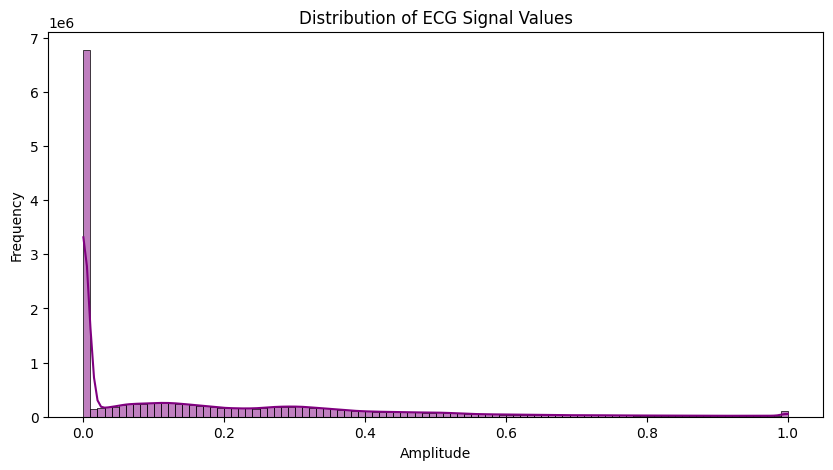

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df.iloc[:, :-1].values.flatten(), bins=100, kde=True, color='purple')
plt.title("Distribution of ECG Signal Values")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

### **📊 What the Plot Shows**
1. **Histogram:**

    - The bars in the histogram show how many times each amplitude value appears in the dataset.
    
    - The **x-axis** represents the **ECG signal amplitudes** (the electrical signal values).
    
    - The **y-axis** represents the **frequency** (how many times those amplitude values occur).

2. **KDE Curve:**

    - The smooth purple line represents the **probability distribution** of the signal values.
    
    - The KDE curve helps you see the **shape of the distribution** more clearly (e.g., is it symmetric, skewed, or multi-peaked?).

### **Interpreting the Plot**
1. **Range of Values:**

    - The x-axis shows the range of ECG signal amplitudes, typically between **0 and 1** if the data is normalized.
    
    - This indicates that the signals have been **scaled or normalized** to fall within a fixed range.

2. **Distribution Shape:**

    - If the histogram shows a **single peak**, the data is likely **normally distributed**.
    
    - If it shows **multiple peaks**, it might indicate different types of heartbeats or variations in the ECG patterns.
    
    - If the distribution is **skewed**, it means there are more low or high amplitude values.

3. **Frequency:**

    - The y-axis shows how often each amplitude value appears.
    
    - For example, if most of the bars are clustered around a specific range (e.g., between **0.0 and 0.1**), it suggests that most ECG signals fall within that amplitude range.

### **📝 Key Takeaways**
1. **Understanding the Data:**

    - This plot helps you understand the overall **distribution** and **range** of ECG signal values.
    
    - You can quickly see if the data has been **normalized** or if there are any **outliers**.

2. **Model Preparation:**

    - Knowing the distribution helps in choosing appropriate **preprocessing steps** (e.g., normalization or scaling).
    
    - It also informs decisions about **model architecture** (e.g., handling outliers or skewed data).

3. **Detecting Issues:**

    - If the distribution has unexpected peaks or gaps, it might indicate **data quality issues** or the presence of **noise**.

### **5.3 Box Plot for Signal Values**
A **box plot** (also known as a **box-and-whisker plot**) is a visualization tool that shows the **distribution of numerical data** and helps to identify **outliers**. In the context of ECG signals, a box plot helps us understand how the **amplitudes of ECG signal values** are spread across the **different time steps**.

When we have a large number of time steps (e.g., **187 time steps** for each heartbeat), a box plot can efficiently summarize the distribution of values at each time step, showing:

- **Median** (middle value)
- **Interquartile Range (IQR)** (spread of the middle 50% of data)
- **Whiskers** (range of most of the data)
- **Outliers** (extreme values that are far from the rest of the data)

This visualization is particularly useful for identifying how consistent or variable the ECG signal amplitudes are across different time steps.

### **📈1: Plot Time Steps in Batches**
This approach divides the time steps into smaller, more manageable batches and creates separate box plots for each batch.

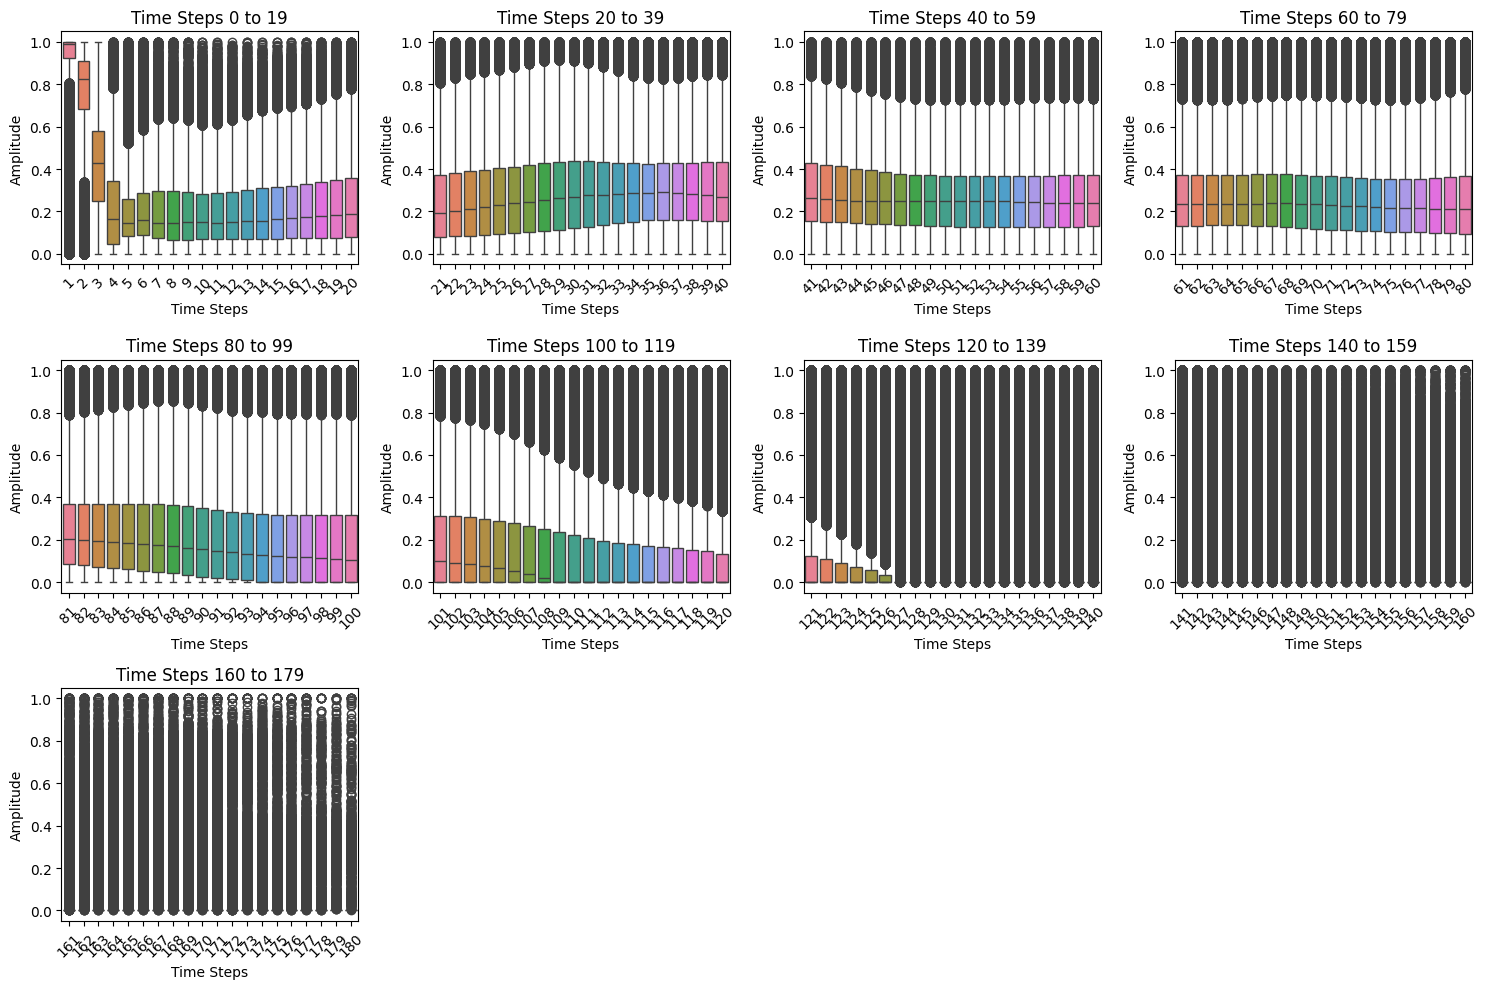

In [11]:
# Number of time steps per batch
batch_size = 20

# Calculate the number of batches
num_batches = train_df.shape[1] // batch_size

# Plot box plots for each batch of time steps
plt.figure(figsize=(15, 10))
for i in range(num_batches):
    start_col = i * batch_size
    end_col = (i + 1) * batch_size
    plt.subplot(3, 4, i + 1)  # Create a grid of subplots (3 rows, 4 columns)
    sns.boxplot(data=train_df.iloc[:, start_col:end_col])
    plt.title(f"Time Steps {start_col} to {end_col - 1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

**Explanation:**

- **Batch Size:** Each batch contains 20 time steps.
    
- **Subplots:** We create a grid of subplots (3 rows and 4 columns) to display multiple batches.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.
    
- **Tight Layout:** Ensures subplots do not overlap.

### **📈 2: Plot a Subsample of Time Steps**
Instead of plotting all 187 time steps, let's plot every **10th time step** to reduce clutter.

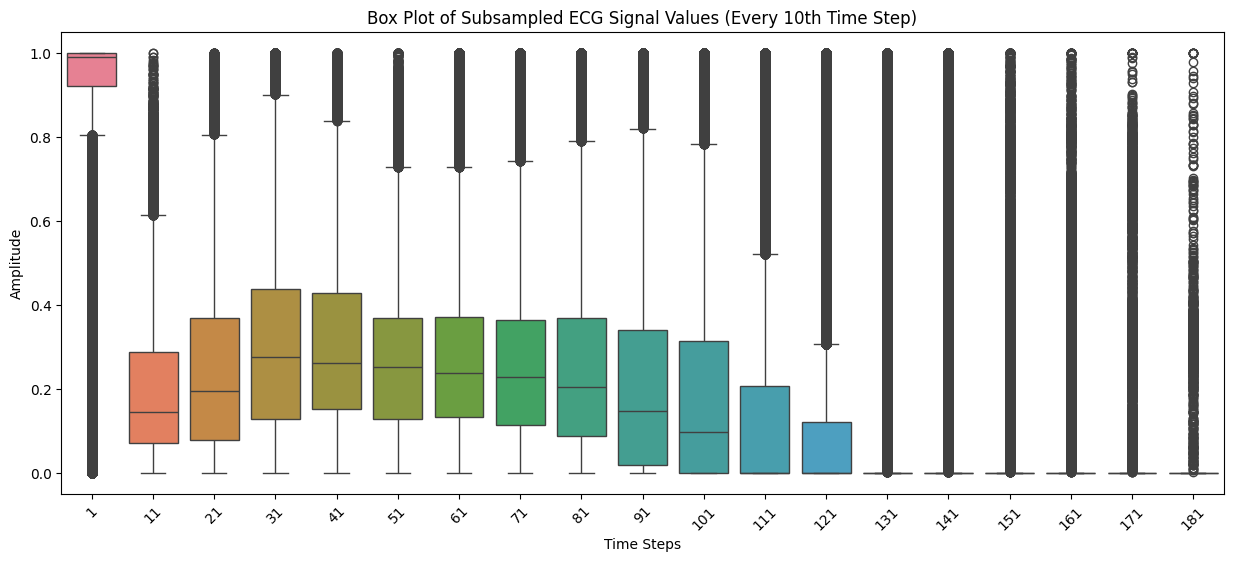

In [12]:
plt.figure(figsize=(15, 6))

# Select every 10th time step
selected_columns = train_df.columns[::10]

sns.boxplot(data=train_df[selected_columns])
plt.title("Box Plot of Subsampled ECG Signal Values (Every 10th Time Step)")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

**Explanation:**

- **Subsampling:** We select every 10th column (::10) from the dataset.
    
- **Box Plot:** Plots the subsampled columns to reduce clutter.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.

### **📊 What the Plot Shows**
1. **Median Line:**

    - The **bold horizontal line** inside each box represents the **median** (50th percentile) of the data for that time step.

2. **Box:**

    - The **box** spans from the **25th percentile (Q1) to the 75th percentile (Q3)**, representing the **Interquartile Range (IQR)**.
    - The IQR contains the **middle 50%** of the data.

3. **Whiskers:**

    - The **lines extending from the box** (called whiskers) show the range of data within **1.5 times the IQR** from Q1 and Q3.
    - Most data points fall within the whiskers.

4. **Outliers:**

    - **Dots or circles** outside the whiskers represent **outliers** (data points that are significantly different from the rest).

5. **X-Axis:**

    - Represents the **time steps** of the ECG signal (e.g., Time Step 1, 2, 3, ..., 187).

6. **Y-Axis:**

    - Represents the **amplitude values** of the ECG signal.

## **6. Detecting Imbalances**

### **6.1 Class Imbalance Visualization**

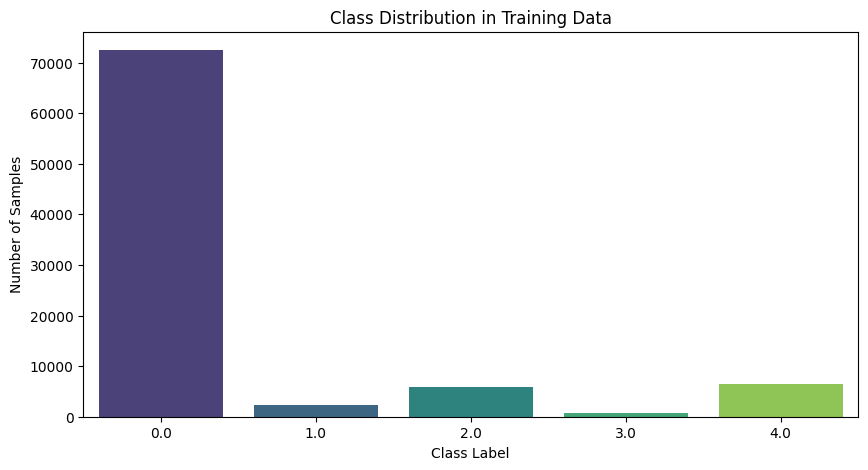

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

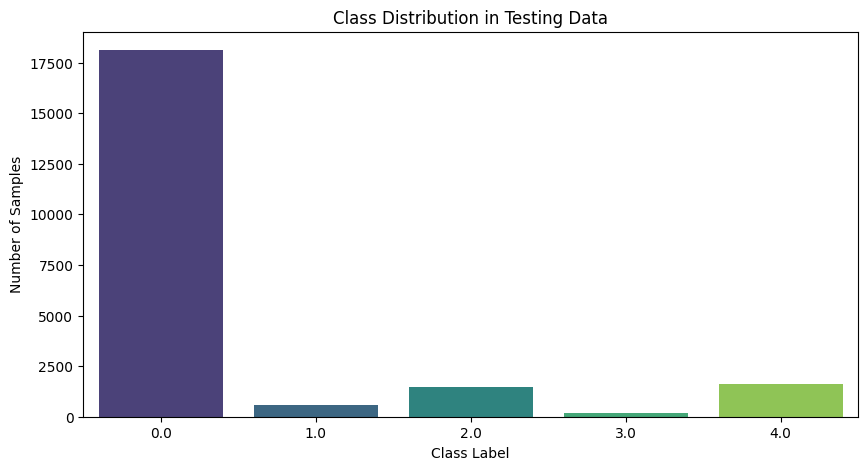

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=test_labels, palette='viridis')
plt.title("Class Distribution in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

## **7. Advanced Visualizations**

### **7.1 Animated Visualization of Heartbeats**
Create an animated plot of a heartbeat signal.

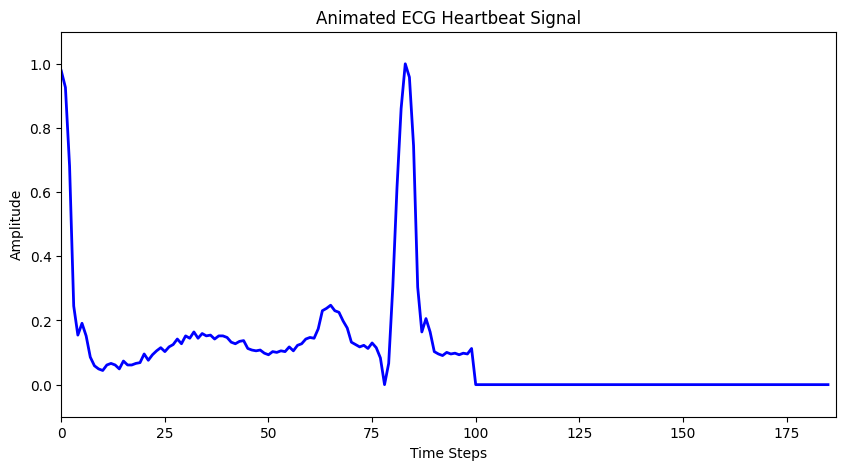

In [15]:
# Select a sample heartbeat (e.g., the first sample)
heartbeat = train_df.iloc[0, :-1].values

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, len(heartbeat))
ax.set_ylim(min(heartbeat) - 0.1, max(heartbeat) + 0.1)
ax.set_title("Animated ECG Heartbeat Signal")
ax.set_xlabel("Time Steps")
ax.set_ylabel("Amplitude")

# Initialize the line object
line, = ax.plot([], [], lw=2, color='blue')

# Initialize function for the animation
def init():
    line.set_data([], [])
    return line,

# Update function for the animation
def update(frame):
    line.set_data(np.arange(frame), heartbeat[:frame])
    return line,

# Create the animation (100 frames, updating every 50 milliseconds)
ani = FuncAnimation(fig, update, frames=len(heartbeat), init_func=init, blit=True, interval=10)

# Display the animation in the notebook
HTML(ani.to_jshtml())

### **7.2 Correlation Heatmap**
Given that the dataset contains **187 time steps**, plotting a heatmap for the full correlation matrix can make the axes cluttered and unreadable. To solve this issue, we'll use the following strategies:

1. **Subsampling:** Instead of showing correlations for all 187 time steps, we'll select every **10th time step** to reduce the number of columns and rows.
    
2. **Annotate the Heatmap:** Add annotations to make it easier to interpret the correlations.
    
3. **Adjust Figure Size:** Increase the figure size for better visualization.
    
4. **Color Scaling:** Use a color scale that clearly differentiates positive and negative correlations.

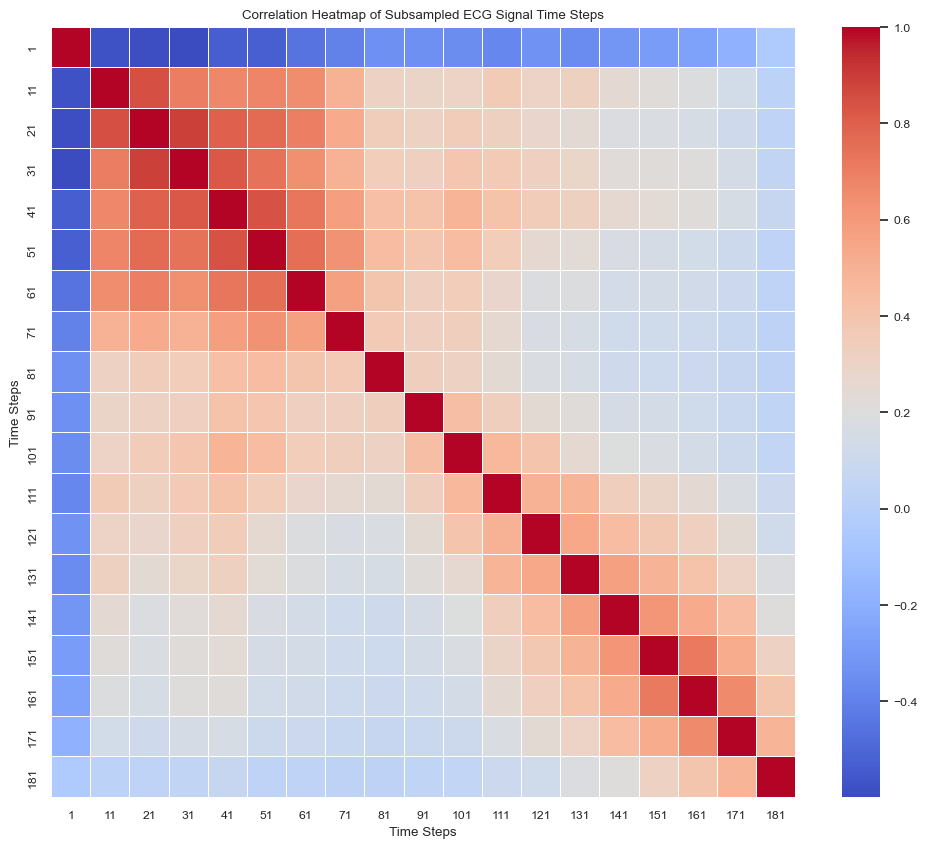

In [16]:
# Extract ECG signal data (excluding the label column)
ecg_data = train_df.iloc[:, :-1]

# Subsample: Select every 10th time step to reduce clutter
subsampled_data = ecg_data.iloc[:, ::10]

# Compute the correlation matrix for the subsampled data
correlation_matrix = subsampled_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,             # Set to True for annotations if needed
    cmap='coolwarm',         
    linewidths=0.5,          
    xticklabels=subsampled_data.columns,  
    yticklabels=subsampled_data.columns
)

# Add titles and labels
plt.title("Correlation Heatmap of Subsampled ECG Signal Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Time Steps")

# Display the plot
plt.show()

**Explanation of the Code**

1. **Subsampling:**

    - We select every **10th time step** using `ecg_data.iloc[:, ::10]`. This reduces the 187 time steps to just 19, making the heatmap easier to read.

2. **Correlation Matrix:**

    - The correlation matrix is computed using `subsampled_data.corr()`.

3. **Heatmap Parameters:**

    - `annot=False`: Set to `True` if you want numerical annotations inside the heatmap cells (but this can be cluttered with too many values).
    
    - `cmap='coolwarm'`: Blue for negative correlations, red for positive correlations.
    
    - `linewidths=0.5`: Adds spacing between cells for clarity.

4. **Figure Size and Font Scale:**

    - **Figure Size:** `plt.figure(figsize=(12, 10))` makes the plot large enough to visualize details.
    
    - **Font Scale:** `sns.set(font_scale=0.8)` ensures the labels are readable.

## **8. Summary of Dataset Insights**
1. **No Missing Values:** The dataset is clean and ready for analysis.

2. **Class Imbalance:** Some classes (e.g., Normal Beats) have significantly more samples than others (e.g., Fusion Beats).

3. **Distinct ECG Patterns:** Each class has unique characteristics (e.g., QRS width).

4. **Signal Range:** The amplitude of ECG signals varies between approximately **-1 and 1**.

## **9. Data Preprocessing**
Normalize data and handle class imbalance.

### **9.1 Normalize data using MinMaxScaler**

In [17]:
# 1. Normalize data using MinMaxScaler
# train_df.columns = train_df.columns.astype(str)
X = train_df.drop('Label', axis=1)  # Drop the target column
y = train_df['Label']  # The target column

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize only the features, not the target

In [18]:
# Check the first 5 rows
print(train_df.head())

          1         2         3         4         5         6         7  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

          8         9        10  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   187  Label  
0  0.0    0.0  
1  0.0    0.0  
2  0.0    0.0  
3  0

In [19]:
# Check statistics (min, max, mean, etc.)
print(train_df.describe())

                  1             2             3             4             5  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  6             7             8             9            10  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240    

In [20]:
# Check unique values per column
print(train_df.nunique())

1        23408
2        42845
3        49611
4        41007
5        39328
         ...  
184        920
185        843
186        778
187        748
Label        5
Length: 188, dtype: int64


### **9.2 Handling Class Imbalance in the ECG Dataset**
Class imbalance is a common issue in datasets where some classes (categories) have significantly **fewer samples** compared to others. In the context of the **ECG Heartbeat Categorization Dataset**, this imbalance can cause our machine learning or deep learning model to perform poorly, especially on the minority classes. For example, if **"Normal Beats"** vastly outnumber **"Fusion Beats"**, the model might be biased towards predicting "Normal Beats" more frequently.

🔍 **Why Class Imbalance is a Problem**

1. **Bias Toward Majority Class:** The model might predict the majority class most of the time, ignoring minority classes.
    
2. **Poor Generalization:** The model fails to learn the features of underrepresented classes, leading to poor performance.
    
3. **Skewed Evaluation Metrics:** Accuracy can be misleading. A model predicting only the majority class can still show high accuracy.

To address class imbalance, we can use techniques like **resampling**, **class weighting**, and other strategies. Let's explore these techniques in detail.

### **📊 Choosing the Right Technique**
| Technique | When to Use | Pros | Cons |
| :-------- | :---------- | :--- | :--- |
| Random Oversampling | Moderate imbalance; simple datasets | Easy to implement | Risk of overfitting |
| SMOTE | Severe imbalance; complex datasets | Reduces overfitting compared to oversampling | Synthetic data may be unrealistic |
| Random Undersampling | Large majority class; quick fixes | Reduces dataset size | Loss of valuable information |
| Tomek Links | Imbalance near class boundaries; noisy datasets | Cleans the decision boundary | May not handle severe imbalance |
| Class Weighting | Large datasets; deep learning models | No data duplication | Needs careful tuning |
| Hybrid Methods | Extreme imbalance; complex problems | Combines strengths of multiple methods | More complex implementation |


### **Summary**
1. **Resampling** techniques modify the dataset by duplicating or removing samples to balance the classes.

2. **Class Weighting** adjusts the importance of each class during training to reduce bias toward the majority class.

3. **Hybrid Approaches** combine multiple methods to tackle severe imbalances effectively.

### **9.2 Handle class imbalance using SMOTE**

In [21]:
# 2. Applying SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' resamples the minority class
X_res, y_res = smote.fit_resample(X_scaled, y)  # Apply SMOTE on the scaled features

In [22]:
# Check the distribution of classes after applying SMOTE
from collections import Counter

print(f"Class distribution after SMOTE: {Counter(y_res)}")
print(f"Class distribution after SMOTE:\n{pd.Series(y_res).value_counts()}")

Class distribution after SMOTE: Counter({0.0: 72471, 1.0: 72471, 2.0: 72471, 3.0: 72471, 4.0: 72471})
Class distribution after SMOTE:
Label
0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: count, dtype: int64


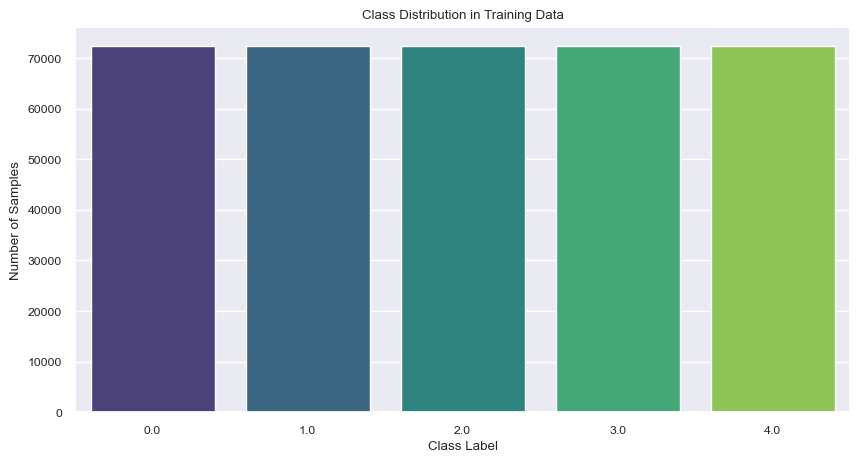

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_res, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

## **10. Model Training and Evaluation** 

In [24]:
# Reshape the data to match the input shape of the model (e.g., (num_samples, 187, 1))
from tensorflow.keras.utils import to_categorical
X_res_reshaped = X_res.reshape((X_res.shape[0], 187, 1))

# One-hot encode the labels
y_res_encoded = to_categorical(y_res, num_classes=5)  # Assuming 5 classes

In [25]:
# Assuming the last column is the label (target) and the others are features
X_test = test_df.iloc[:, :-1].values  # Features 
y_test = test_df.iloc[:, -1].values  # Labels 

In [26]:
# Normalize the test data using MinMaxScaler (assuming the training data was scaled)
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Apply the same scaler that was used for training data

In [27]:
# Reshape the test data to match the model's expected input shape (e.g., (num_samples, 187, 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 187, 1))

In [28]:
# One-hot encode the labels for evaluation (if needed, based on model output)
y_test_encoded = to_categorical(y_test, num_classes=5)  # Assuming 5 classes

### **1. 1D Convolutional Neural Networks (1D CNNs)**
1D CNNs are designed to process sequential data like ECG signals by
applying filters to detect local patterns (e.g., P-wave, QRS complex,
T-wave).

In [29]:
# Define and compile the model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(187, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes: N, S, V, F, Q
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [30]:
# Train the model 
history = model.fit(X_res_reshaped, y_res_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
9059/9059 [==============================] - 59s 6ms/step - loss: 0.1888 - accuracy: 0.9323 - val_loss: 0.2695 - val_accuracy: 0.9218
Epoch 2/10
9059/9059 [==============================] - 54s 6ms/step - loss: 0.0668 - accuracy: 0.9776 - val_loss: 0.1008 - val_accuracy: 0.9652
Epoch 3/10
9059/9059 [==============================] - 54s 6ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 4/10
9059/9059 [==============================] - 54s 6ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0584 - val_accuracy: 0.9828
Epoch 5/10
9059/9059 [==============================] - 53s 6ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 6/10
9059/9059 [==============================] - 53s 6ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 7/10
9059/9059 [==============================] - 55s 6ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0155 - val_ac

In [31]:
# Predicting labels for the test set using the trained model
y_pred = model.predict(X_test_reshaped)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

685/685 [==============================] - 3s 5ms/step
Test Accuracy: 0.9798


In [32]:
# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='macro') 
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='macro') 
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9798
Precision: 0.9031
Recall: 0.9086
F1-Score: 0.9057


In [33]:
# Predict
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to labels
y_true = np.argmax(y_test_encoded, axis=1)

# Classification Report
print(classification_report(y_true, y_pred, target_names=[
    "Normal (N)", "Supraventricular (S)", "Ventricular (V)", "Fusion (F)", "Unknown (Q)"
]))

685/685 [==============================] - 3s 5ms/step
                      precision    recall  f1-score   support

          Normal (N)       0.99      0.99      0.99     18118
Supraventricular (S)       0.78      0.80      0.79       556
     Ventricular (V)       0.96      0.94      0.95      1448
          Fusion (F)       0.80      0.84      0.82       162
         Unknown (Q)       0.99      0.98      0.99      1608

            accuracy                           0.98     21892
           macro avg       0.90      0.91      0.91     21892
        weighted avg       0.98      0.98      0.98     21892



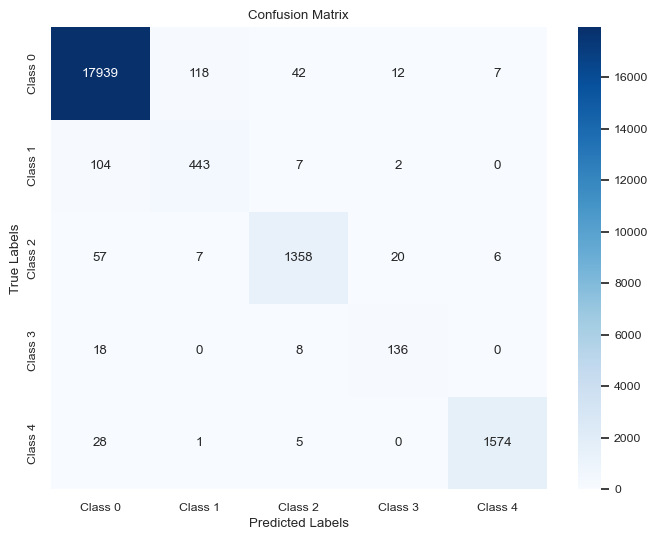

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

ROC-AUC Score: 0.9858


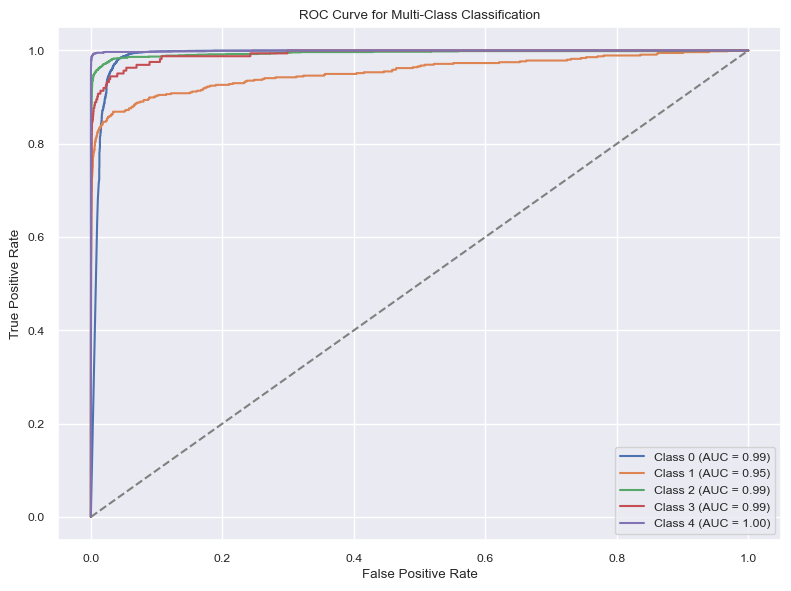

In [35]:
# One-hot encode ground truth
y_test_binary = label_binarize(y_true, classes=[0, 1, 2, 3, 4])  

# ROC-AUC Score (macro average)
roc_auc = roc_auc_score(y_test_binary, y_pred_probs, average='macro', multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve per class
plt.figure(figsize=(8,6))
for i in range(5):  # 5 classes
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_pred_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Specificity Calculation
# Specificity = True Negatives / (True Negatives + False Positives)
specificity_list = []
for i in range(cm.shape[0]):
    tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))  # All TNs are the sum of non-diagonal elements
    fp = np.sum(cm[:, i]) - cm[i, i]  # All FP for class i
    specificity = tn / (tn + fp)  # Specificity for class i
    specificity_list.append(specificity)

# Average Specificity across all classes
average_specificity = np.mean(specificity_list)
print(f"Average Specificity: {average_specificity:.4f}")

Average Specificity: 0.9868


In [37]:
# Balanced Accuracy (average of sensitivity and specificity)
balanced_accuracy = (recall + average_specificity) / 2
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Balanced Accuracy: 0.9477


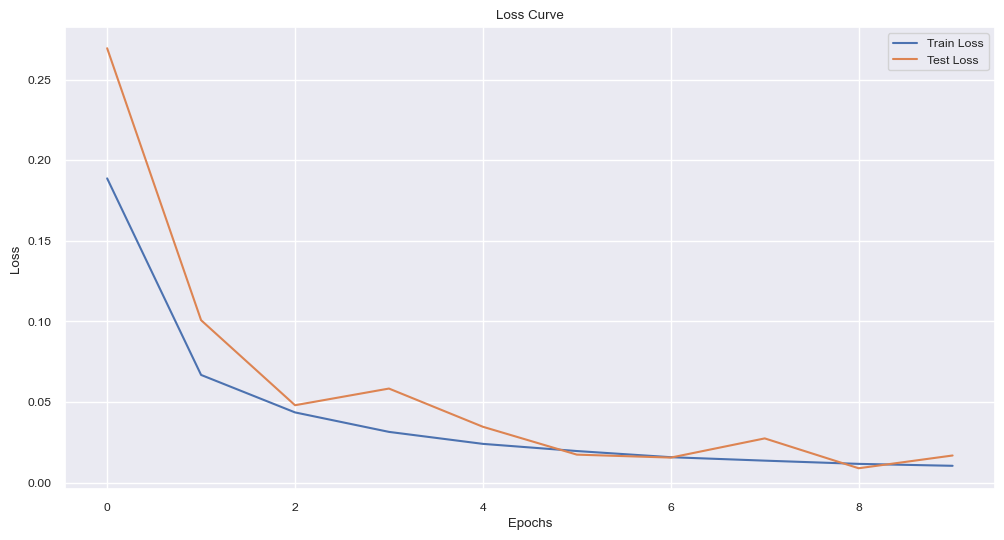

In [39]:
# Plotting the loss curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')  # Training loss
plt.plot(history.history['val_loss'], label='Test Loss')  # Validation loss
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

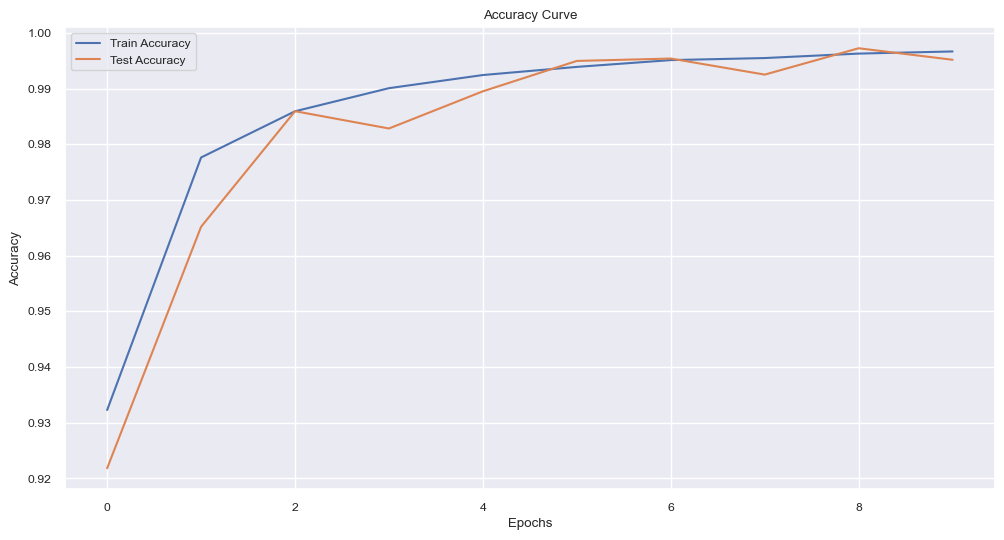

In [40]:
# Plotting the accuracy curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model.save("CNN_model.h5", save_format="h5")